<a href="https://colab.research.google.com/github/azkbrqlna/2025-AI-Praktikum/blob/main/UTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

### Ekspor Dataset dan Preview

In [10]:
df = pd.read_csv("airbnb.csv")

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Info Data

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Missing Values

In [12]:
df.isnull().sum()

,0
id,0
name,16
host_id,0
host_name,21
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### Data Cleaning

In [14]:
# Konversi kolom 'last_review' ke format datetime, salah format jadi NaT
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
# Menghapus entri yang tidak memiliki nama listing (nama properti)
df = df.dropna(subset=['name'])

# Mengisi nama host yang kosong dengan 'Unknown'
df['host_name'] = df['host_name'].fillna('Unknown')

# Mengisi nilai kosong pada 'reviews_per_month' dengan 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

# Menghapus data duplikat jika ada
df = df.drop_duplicates()

# Menghapus data dengan harga tidak wajar atau jumlah minimum malam terlalu tinggi
df = df[df['price'] > 0]
df = df[df['minimum_nights'] < 365]

df.isnull().sum()

,0
id,0
name,0
host_id,0
host_name,0
neighbourhood_group,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


### Analisis Deskriptif

In [15]:
# Analisis kolom kategorikal
print("\nNeighbourhood Group Distribution:")
print(df['neighbourhood_group'].value_counts())

print("\nRoom Type Distribution:")
print(df['room_type'].value_counts())

# Analisis kolom numerik
print("\nPrice Statistics:")
print(f"Min: {df['price'].min()}")
print(f"Max: {df['price'].max()}")
print(f"Mean: {df['price'].mean():.2f}")
print(f"Median: {df['price'].median()}")
print(f"Std Dev: {df['price'].std():.2f}")

# Menghitung perbandingan harga min dan max
price_range = df['price'].max() - df['price'].min()
print(f"\nPrice Range: {price_range}")


Neighbourhood Group Distribution:
neighbourhood_group
Manhattan        21631
Brooklyn         20073
Queens            5662
Bronx             1088
Staten Island      372
Name: count, dtype: int64

Room Type Distribution:
room_type
Entire home/apt    25373
Private room       22297
Shared room         1156
Name: count, dtype: int64

Price Statistics:
Min: 10
Max: 10000
Mean: 152.65
Median: 106.0
Std Dev: 239.91

Price Range: 9990


---

### Menampilkan Grafik

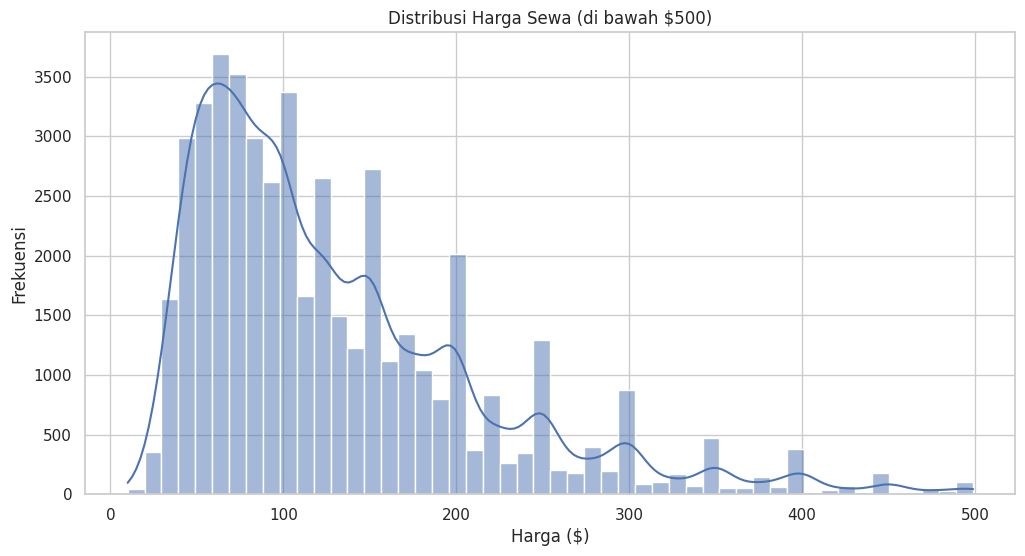

In [19]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['price'] < 500]['price'], bins=50, kde=True)
plt.title('Distribusi Harga Sewa (di bawah $500)')
plt.xlabel('Harga ($)')
plt.ylabel('Frekuensi')
plt.show()

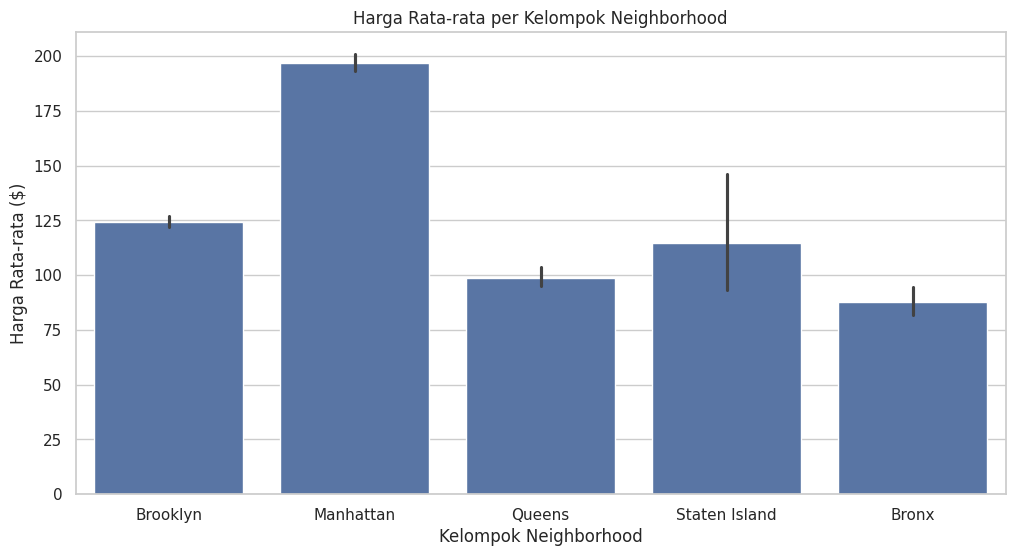

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x='neighbourhood_group', y='price', data=df, estimator=np.mean)
plt.title('Harga Rata-rata per Kelompok Neighborhood')
plt.xlabel('Kelompok Neighborhood')
plt.ylabel('Harga Rata-rata ($)')
plt.show()

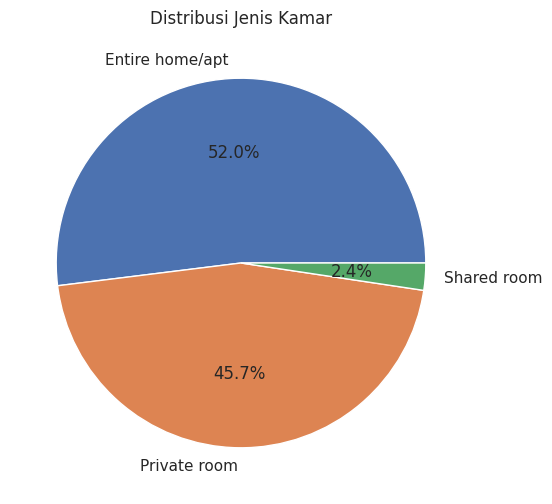

In [21]:
plt.figure(figsize=(8, 6))
df['room_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribusi Jenis Kamar')
plt.ylabel('')
plt.show()

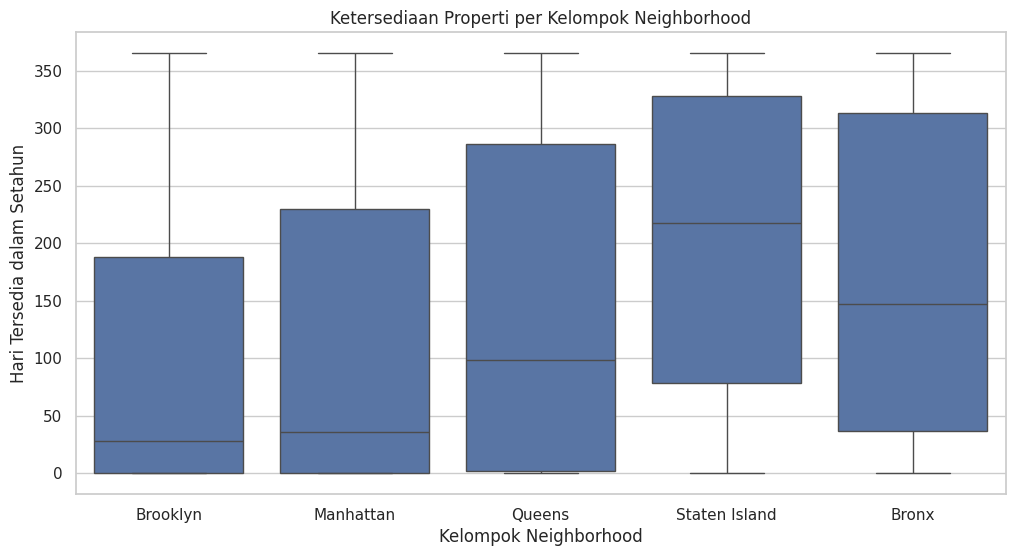

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='neighbourhood_group', y='availability_365', data=df)
plt.title('Ketersediaan Properti per Kelompok Neighborhood')
plt.xlabel('Kelompok Neighborhood')
plt.ylabel('Hari Tersedia dalam Setahun')
plt.show()

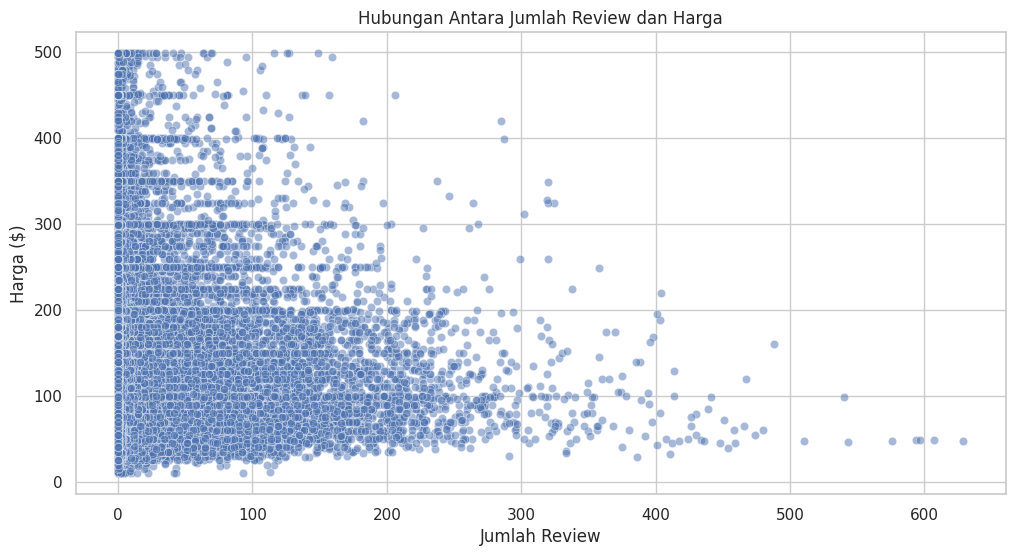

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='number_of_reviews', y='price', data=df[df['price'] < 500], alpha=0.5)
plt.title('Hubungan Antara Jumlah Review dan Harga')
plt.xlabel('Jumlah Review')
plt.ylabel('Harga ($)')
plt.show()

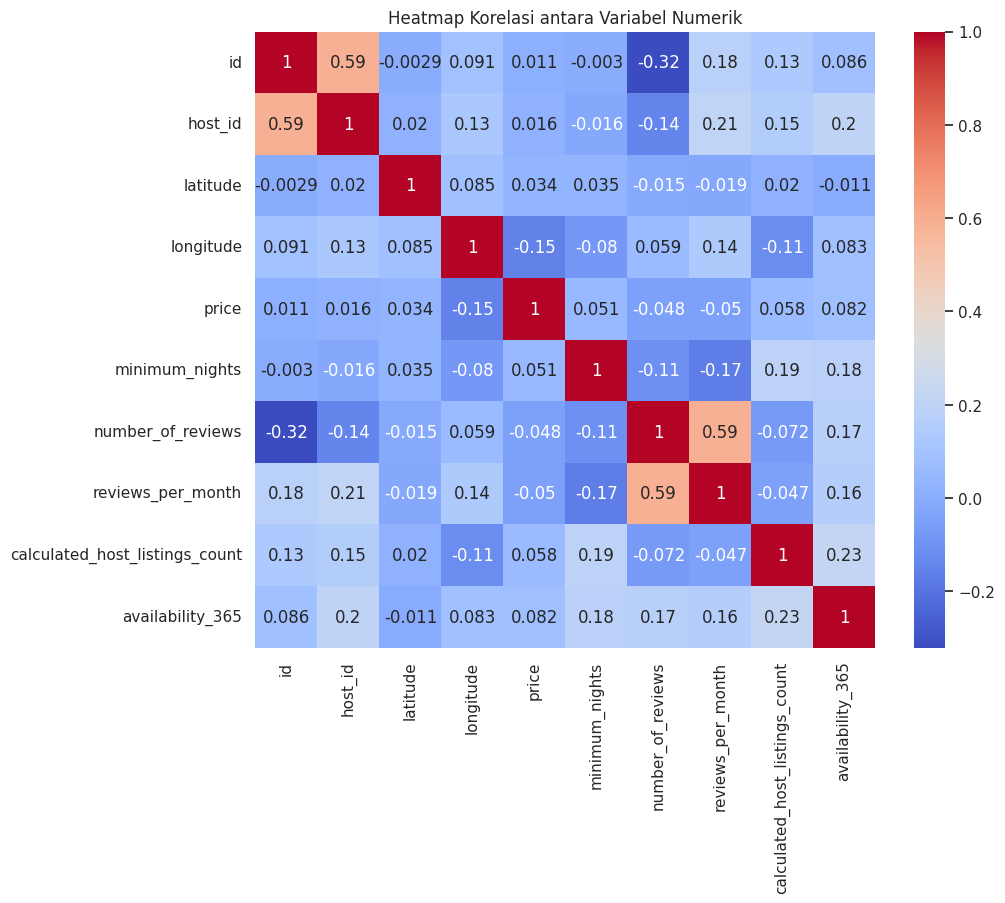

In [24]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antara Variabel Numerik')
plt.show()